# Data Smoothing

Before any diffusion coefficients calculation, the data smoothing is required for original experimental datasets.
Here is an example for data smoothing of Ni-Mo 1100C 1000 hours diffusion data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pydiffusion.plot import profileplot
from pydiffusion.io import read_csv, save_csv

## Read experimental data

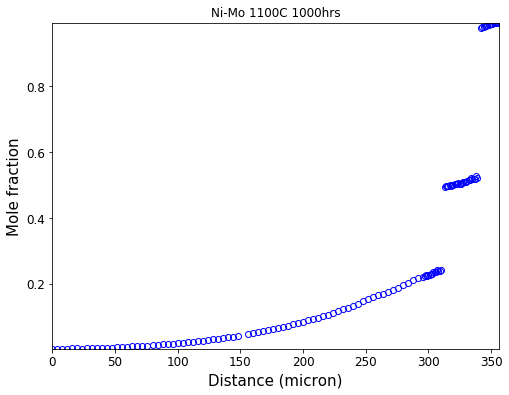

In [2]:
NiMo_exp, _ = read_csv('NiMo_exp.csv')

ax = plt.figure(figsize=(8,6)).add_subplot(111)
ax.set_title('Ni-Mo 1100C 1000hrs')
profileplot(NiMo_exp, ax, c='b', marker='o', ls='none', fillstyle='none')
plt.show()

## Use datasmooth function to smooth the data

For multiple phases situation, interfaces locations are required as inputs. Ni-Mo has 3 phases at 1100C, 2 interfaces must be provided.

The function will smooth the profile in the following steps:
1. Ask if zoom in is required inside the phase. The zoom in range (start and end location in micron) should be entered.
2. Ask if the start and end composition need to be changed, since the default smoothing won't change the start and end data points.
3. Moving "radius" smoothing, input radius and times. For each data point at location d, its nearby data within [d-r, d+r] are averaged, in which r is the radius in micron.
4. If the smoothing is not good, redo the smoothing.

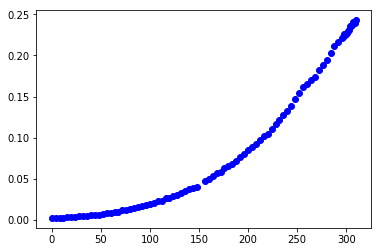

Enter the zoomed in start and end location, if no, enter nothing



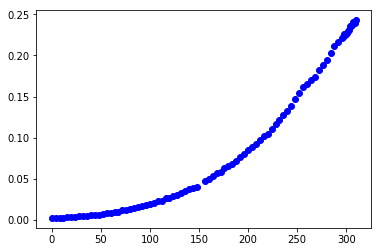

Enter Start and End Composition for this region: [0.00253116433559 0.242800824478]

Smooth Radius and Times: [1 1]
20 2


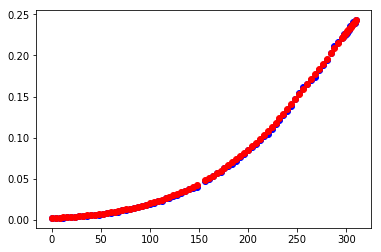

Redo this smooth? (y/[n])


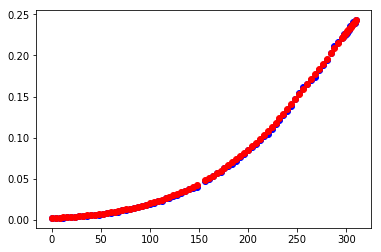

Further smooth for this phase? (y/[n])


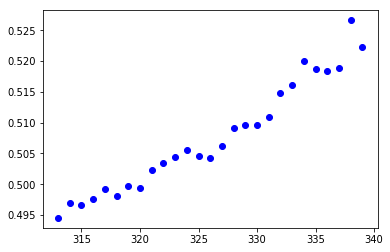

Enter the zoomed in start and end location, if no, enter nothing



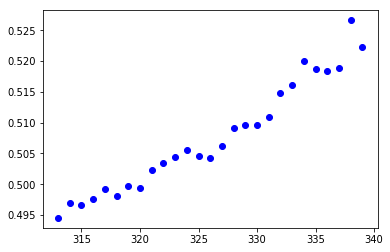

Enter Start and End Composition for this region: [0.49451967118 0.522348614265]
.495 .525
Smooth Radius and Times: [1 1]
10 2


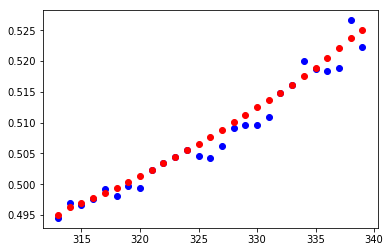

Redo this smooth? (y/[n])


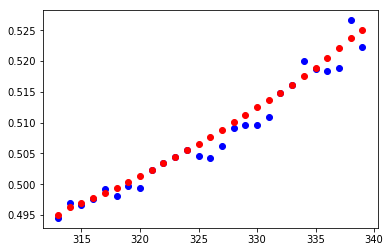

Further smooth for this phase? (y/[n])


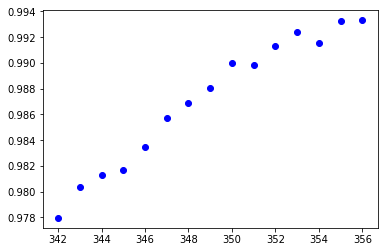

Enter the zoomed in start and end location, if no, enter nothing



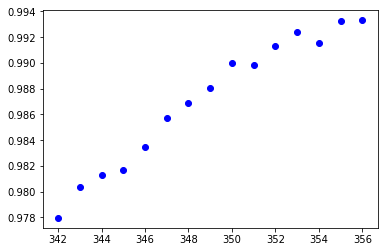

Enter Start and End Composition for this region: [0.977964050294 0.993315788947]
.978 .9935
Smooth Radius and Times: [1 1]
5 1


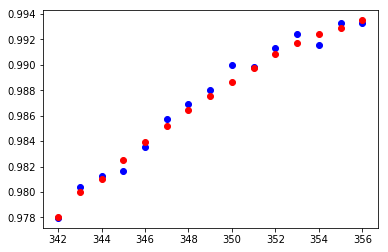

Redo this smooth? (y/[n])


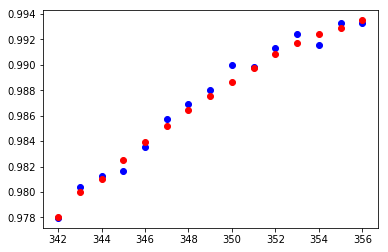

Further smooth for this phase? (y/[n])


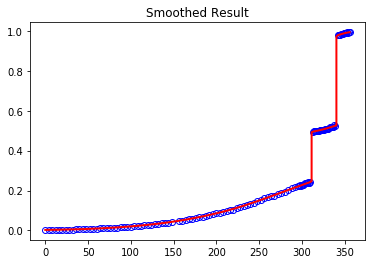

In [3]:
from pydiffusion.smooth import datasmooth

NiMo_sm = datasmooth(NiMo_exp, [311.5, 340.5])

## Plot the save the results

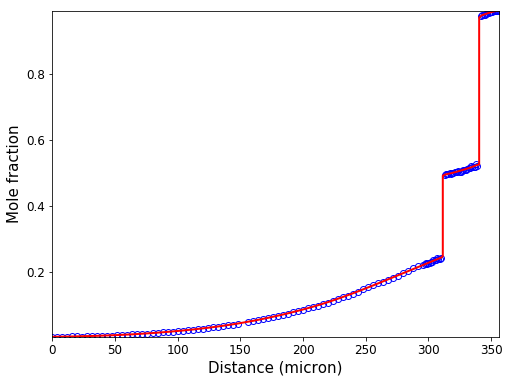

In [4]:
ax = plt.figure(figsize=(8,6)).add_subplot(111)
profileplot(NiMo_exp, ax, c='b', marker='o', ls='none', fillstyle='none')
profileplot(NiMo_sm, ax, c='r')
plt.show()

In [5]:
save_csv('NiMo_sm.csv', profile=NiMo_sm)